In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from labellines import labelLine, labelLines
import ppscore as pps

%matplotlib inline
plt.style.use('seaborn')

# Initial Questions
##### 1. How does Iraqi life expectancy compare to other countries in Asia ? And vs the rest of the world? 
##### 2. What does Iraqi life expectancy look like over time?
##### 3. Are there any anomalies? Investigate
##### 4. What are the differences in life expectancy by gender?
##### 5. Are there any good predictive factors for life expectancy available from the Gapminder data?
##### 6. Iraqi GDP vs. 10 western nations - 1950 and 2015
##### 7. Income per person - same 11 countries (Iraq + 10 western nations)

## Data Prep

In [144]:
# This fuction import_new_data() uses pandas read_csv() to import CSV files, transposes the files so that year values 
# become a column rather than the column headers. If a country name is passed into the function, it will filter the 
# CSV for that country and create a column name for the data based on the name of the file

def import_new_data(file_path, country=None):
    
    df = pd.read_csv(str(file_path),header=None)
    df = df.transpose()
    df = df.replace('country','year')
    
    headers = df.iloc[0] 
    df.columns = headers
    df = df[1:]
   
    col_name = file_path.split('/')[-1].split('.')[0]

    if country:
        df = df[['year','{}'.format(country)]]
        df = df.rename(columns={'{}'.format(country):'{}'.format(col_name)})
        
        df['year'] = pd.to_numeric(df['year'],downcast='integer')
        df.iloc[:,1] = pd.to_numeric(df.iloc[:,1],downcast='float')
        
        
        
        return df
    else:
        return df


# I'll use this function later on, but for now I'll use the df in it's original shape.

In [145]:
df = pd.read_csv('life_expectancy_years.csv')

# I'll look at global life expectancy from 1940 - 2020

#drop columns up to the year 1940
cols_to_drop1 = list(range(1,141))
df.drop(df.columns[cols_to_drop1], axis=1, inplace = True)

#drop columns beyond the year 2020
cols_to_drop2 = list(range(82,162))
df.drop(df.columns[cols_to_drop2], axis=1, inplace = True)
df.head()

,country,1940,1941,1942,1943,1944,1945,1946,1947,1948,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,31.9,31.9,32.0,32.1,32.1,32.2,32.2,32.3,32.4,...,60.4,60.8,61.3,61.2,61.2,61.2,63.4,63.7,64.1,64.4
1,Albania,42.0,41.5,40.0,37.0,34.0,47.0,50.0,51.5,52.4,...,77.7,77.8,77.9,77.9,78.0,78.1,78.2,78.3,78.5,78.6
2,Algeria,37.3,35.6,34.9,30.2,35.7,33.5,35.7,39.1,42.3,...,76.5,76.8,76.9,77.0,77.1,77.4,77.7,77.9,78.1,78.3
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.4,82.4,82.5,82.5,82.6,82.7,82.7,NaN,NaN,NaN
4,Angola,31.8,32.1,32.5,32.8,33.1,33.5,33.8,34.1,34.5,...,60.6,61.3,61.9,62.8,63.3,63.8,64.2,64.6,65.0,65.4


In [146]:
#Compute the mean for each country and assign to new column in df
df['mean'] = df.mean(axis=1)

In [147]:
df.head()

,country,1940,1941,1942,1943,1944,1945,1946,1947,1948,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,mean
0,Afghanistan,31.9,31.9,32.0,32.1,32.1,32.2,32.2,32.3,32.4,...,60.8,61.3,61.2,61.2,61.2,63.4,63.7,64.1,64.4,46.895062
1,Albania,42.0,41.5,40.0,37.0,34.0,47.0,50.0,51.5,52.4,...,77.8,77.9,77.9,78.0,78.1,78.2,78.3,78.5,78.6,67.217284
2,Algeria,37.3,35.6,34.9,30.2,35.7,33.5,35.7,39.1,42.3,...,76.8,76.9,77.0,77.1,77.4,77.7,77.9,78.1,78.3,61.983951
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.4,82.5,82.5,82.6,82.7,82.7,NaN,NaN,NaN,79.770833
4,Angola,31.8,32.1,32.5,32.8,33.1,33.5,33.8,34.1,34.5,...,61.3,61.9,62.8,63.3,63.8,64.2,64.6,65.0,65.4,47.227160


## 1. How does Iraqi life expectancy compare to other countries in Asia?

In [148]:
asia_list = ['China', 'India', 'Indonesia', 'Pakistan', 'Bangladesh', 'Japan', 'Philippines', 'Vietnam', 'Turkey', 
             'Iran', 'Thailand','Myanmar', 'South Korea','Iraq','Afghanistan','Saudi Arabia','Uzbekistan','Malaysia',
             'Yemen','Nepal','North Korea','Sri Lanka','Kazakhstan','Syria','Cambodia','Jordan','Azerbaijan',
             'United Arab Emirates','Tajikistan','Israel','Laos','Lebanon','Kyrgyzstan','Turkmenistan','Singapore',
             'Oman','Palestine','Kuwait','Georgia'',Mongolia','Armenia','Qatar','Bahrain','Timor-Leste',
             'Cyprus','Bhutan','Maldives','Brunei']

#select countries from df if in asia_list
df_asia = df[df['country'].isin(asia_list)]

#add boolean column 'is_iraq' for highlighting Iraq in plot
df_asia['is_iraq'] = df_asia['country'] == 'Iraq'

<ipython-input-148-7c0d36b4100b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['is_iraq'] = df_asia['country'] == 'Iraq'


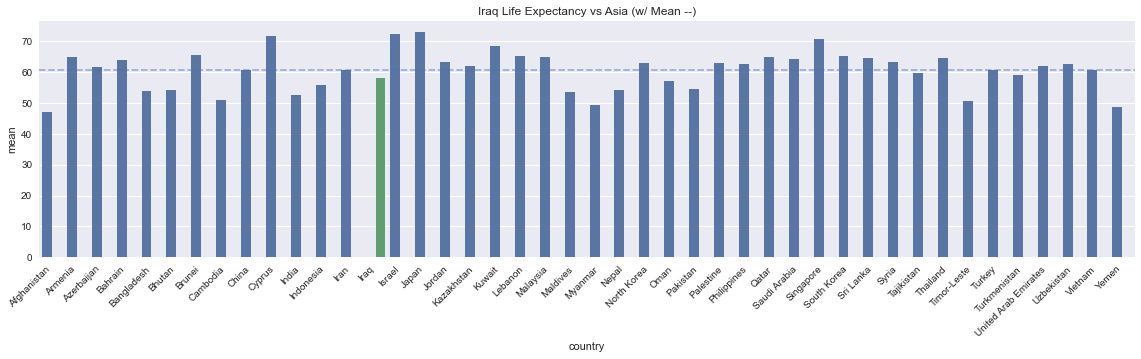

In [149]:
#Seaborn barplot with Iraq highlighted
mean_le = sns.catplot(
    data=df_asia,
    x='country',
    y='mean',
    kind='bar',
    height=4, 
    aspect=4,
    hue='is_iraq',
    legend=False)

plt.title('Iraq Life Expectancy vs Asia (w/ Mean --)')

#set rotation and alignment of xtick labels
mean_le.set_xticklabels(rotation=45,horizontalalignment = 'right')

#plot an average line for life expectancy in df_asia
plt.axhline(y=df_asia['mean'].mean(), xmin=0, xmax=1,label='Asia Average',ls = '--',alpha=0.5);

#### The plot above shows that for 1940-2020, mean Iraqi life expectancy is just slightly below that of other countries in Asia

## Question 2. And vs the rest of the world?

In [150]:
df2 = import_new_data('life_expectancy_years.csv')
df2 = df2.query('year <= 2020 & year >=1940')

In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 141 to 221
Columns: 188 entries, year to Zimbabwe
dtypes: object(188)
memory usage: 119.6+ KB


In [152]:
#get the mean of each country, then the mean of the means to get the global mean for the period in df2
df2.loc['mean'] = df2.mean()
df2['mean'] = df2.iloc[:,1:].mean(axis=1)
df2.tail()

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,mean
218,2017,63.4,78.2,77.7,82.7,64.2,77,76.7,75.6,82.4,...,78.6,77,70.3,64.7,75.3,74.5,68.1,63.2,61.4,72.737433
219,2018,63.7,78.3,77.9,NaN,64.6,77.2,76.8,75.8,82.5,...,78.6,77.2,70.5,64.9,75.2,74.6,68.1,63.7,61.7,72.969022
220,2019,64.1,78.5,78.1,NaN,65,77.3,77,75.9,82.7,...,78.6,77.3,70.7,65,75.1,74.7,68.1,64,62,73.184783
221,2020,64.4,78.6,78.3,NaN,65.4,77.4,77.1,76,82.8,...,78.6,77.5,70.8,65.1,75.1,74.8,68.2,64.3,62.3,73.391304
mean,1980,46.8951,67.2173,61.984,79.7708,47.2272,68.6432,68.9457,64.8531,74.863,...,73.1815,70.1593,62.5358,56.3099,66.0259,60.5025,48.5778,50.4469,53.0037,61.149643


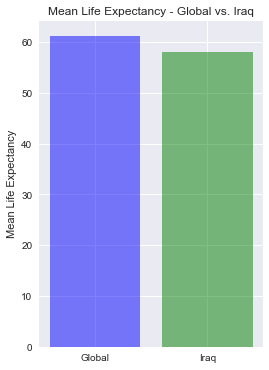

In [153]:
global_mean = df2.loc['mean']['mean']
iraq_mean = df2.loc['mean']['Iraq']

locations = [1,2]
heights = [global_mean,iraq_mean]
colors = ['blue','green']
labels = ['Global','Iraq']

figure(figsize=(4,6))
plt.bar(locations, heights, color=colors,tick_label=labels,alpha=.5)
plt.title('Mean Life Expectancy - Global vs. Iraq')
plt.ylabel('Mean Life Expectancy');


### Question 3. What does Iraqi life expectancy look like over time?

In [154]:
df_iraq = import_new_data('life_expectancy_years.csv','Iraq')
df_iraq = df_iraq.query('year >= 1940 & year <= 2020')

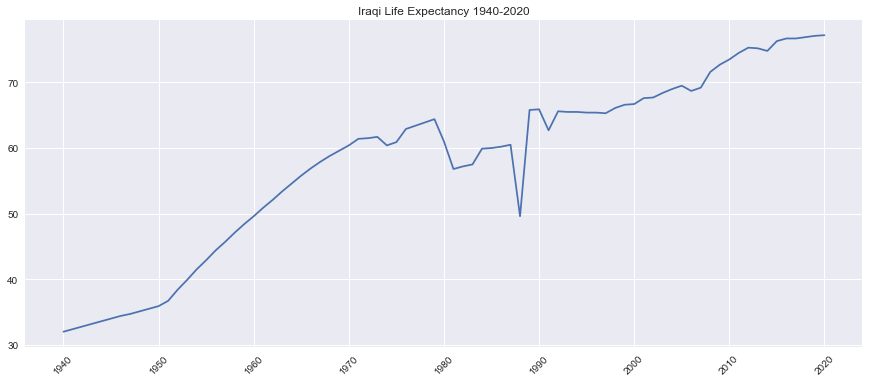

In [155]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df_iraq['year'],df_iraq['life_expectancy_years'])
plt.xticks(rotation = 45)
plt.title('Iraqi Life Expectancy 1940-2020');

## Question 4. Are there any anomalies? Investigate

#### We can see a clear disturbance in the trend beginning just prior to 1980 until 1991 - what happened here?
- The [Iran-Iraq war](https://en.wikipedia.org/wiki/Iran%E2%80%93Iraq_War) appears to be the major event that triggered this decline

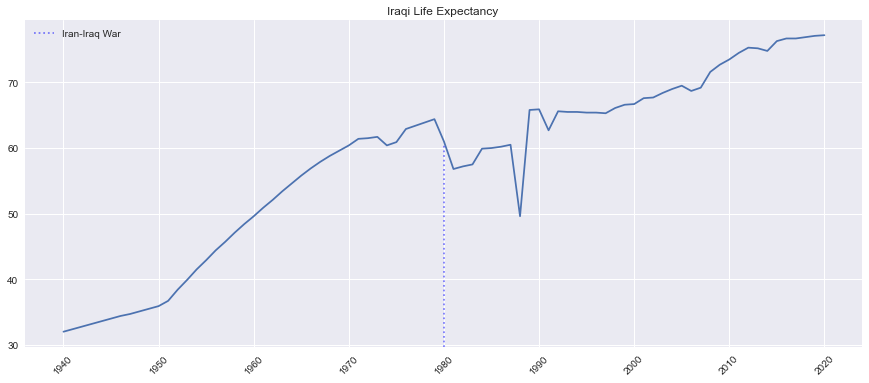

In [156]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df_iraq['year'],df_iraq['life_expectancy_years'])
plt.xticks(rotation = 45)
plt.title('Iraqi Life Expectancy ')

#plot vertical line marking event
plt.axvline(x=1980,ymax=.62,linestyle=':',color='b',label='Iran-Iraq War',alpha=0.5)

plt.legend();

#### What was the scale of the impact?
- From what we see below, Iraqi life expectancy dropped nearly 15 years over the course of the war

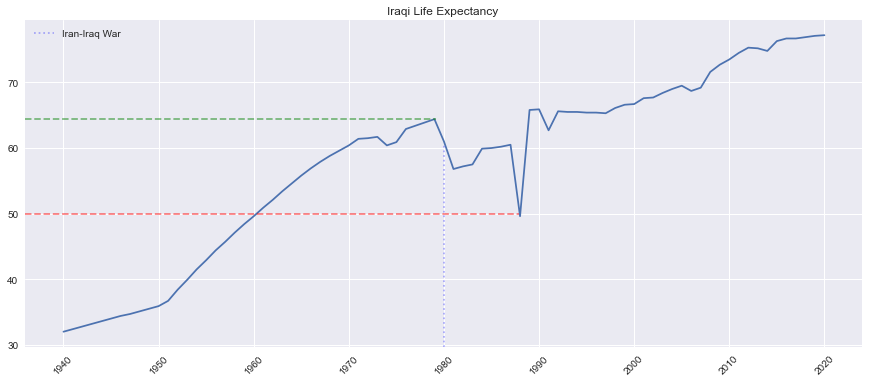

In [157]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df_iraq['year'],df_iraq['life_expectancy_years'])
plt.xticks(rotation = 45)
plt.title('Iraqi Life Expectancy ')

#plot vertical line marking event
plt.axvline(x=1980,ymax=.62,linestyle=':',color='b',label='Iran-Iraq War',alpha=0.3)

#plot horizontal line to meet y-axis
plt.axhline(y=64.5,xmax=.49,linestyle='--',alpha=0.5,color='g')
plt.axhline(y=50,xmax=.59,linestyle='--',alpha=0.5,color='r')

plt.legend();

#### Now that the anomalous data has been explained, what about the overall trend? I'll plot a 10-year moving average to visualise

In [158]:
#create moving average with window of 10 (years)
df_iraq['10yr_ma'] = df_iraq['life_expectancy_years'].rolling(window=10,min_periods=None).mean()

In [159]:
df_iraq.head(20)

,year,life_expectancy_years,10yr_ma
141,1940,32.000000,NaN
142,1941,32.400002,NaN
143,1942,32.799999,NaN
144,1943,33.200001,NaN
145,1944,33.599998,NaN
146,1945,34.000000,NaN
147,1946,34.400002,NaN
148,1947,34.700001,NaN
149,1948,35.099998,NaN
150,1949,35.500000,33.770000


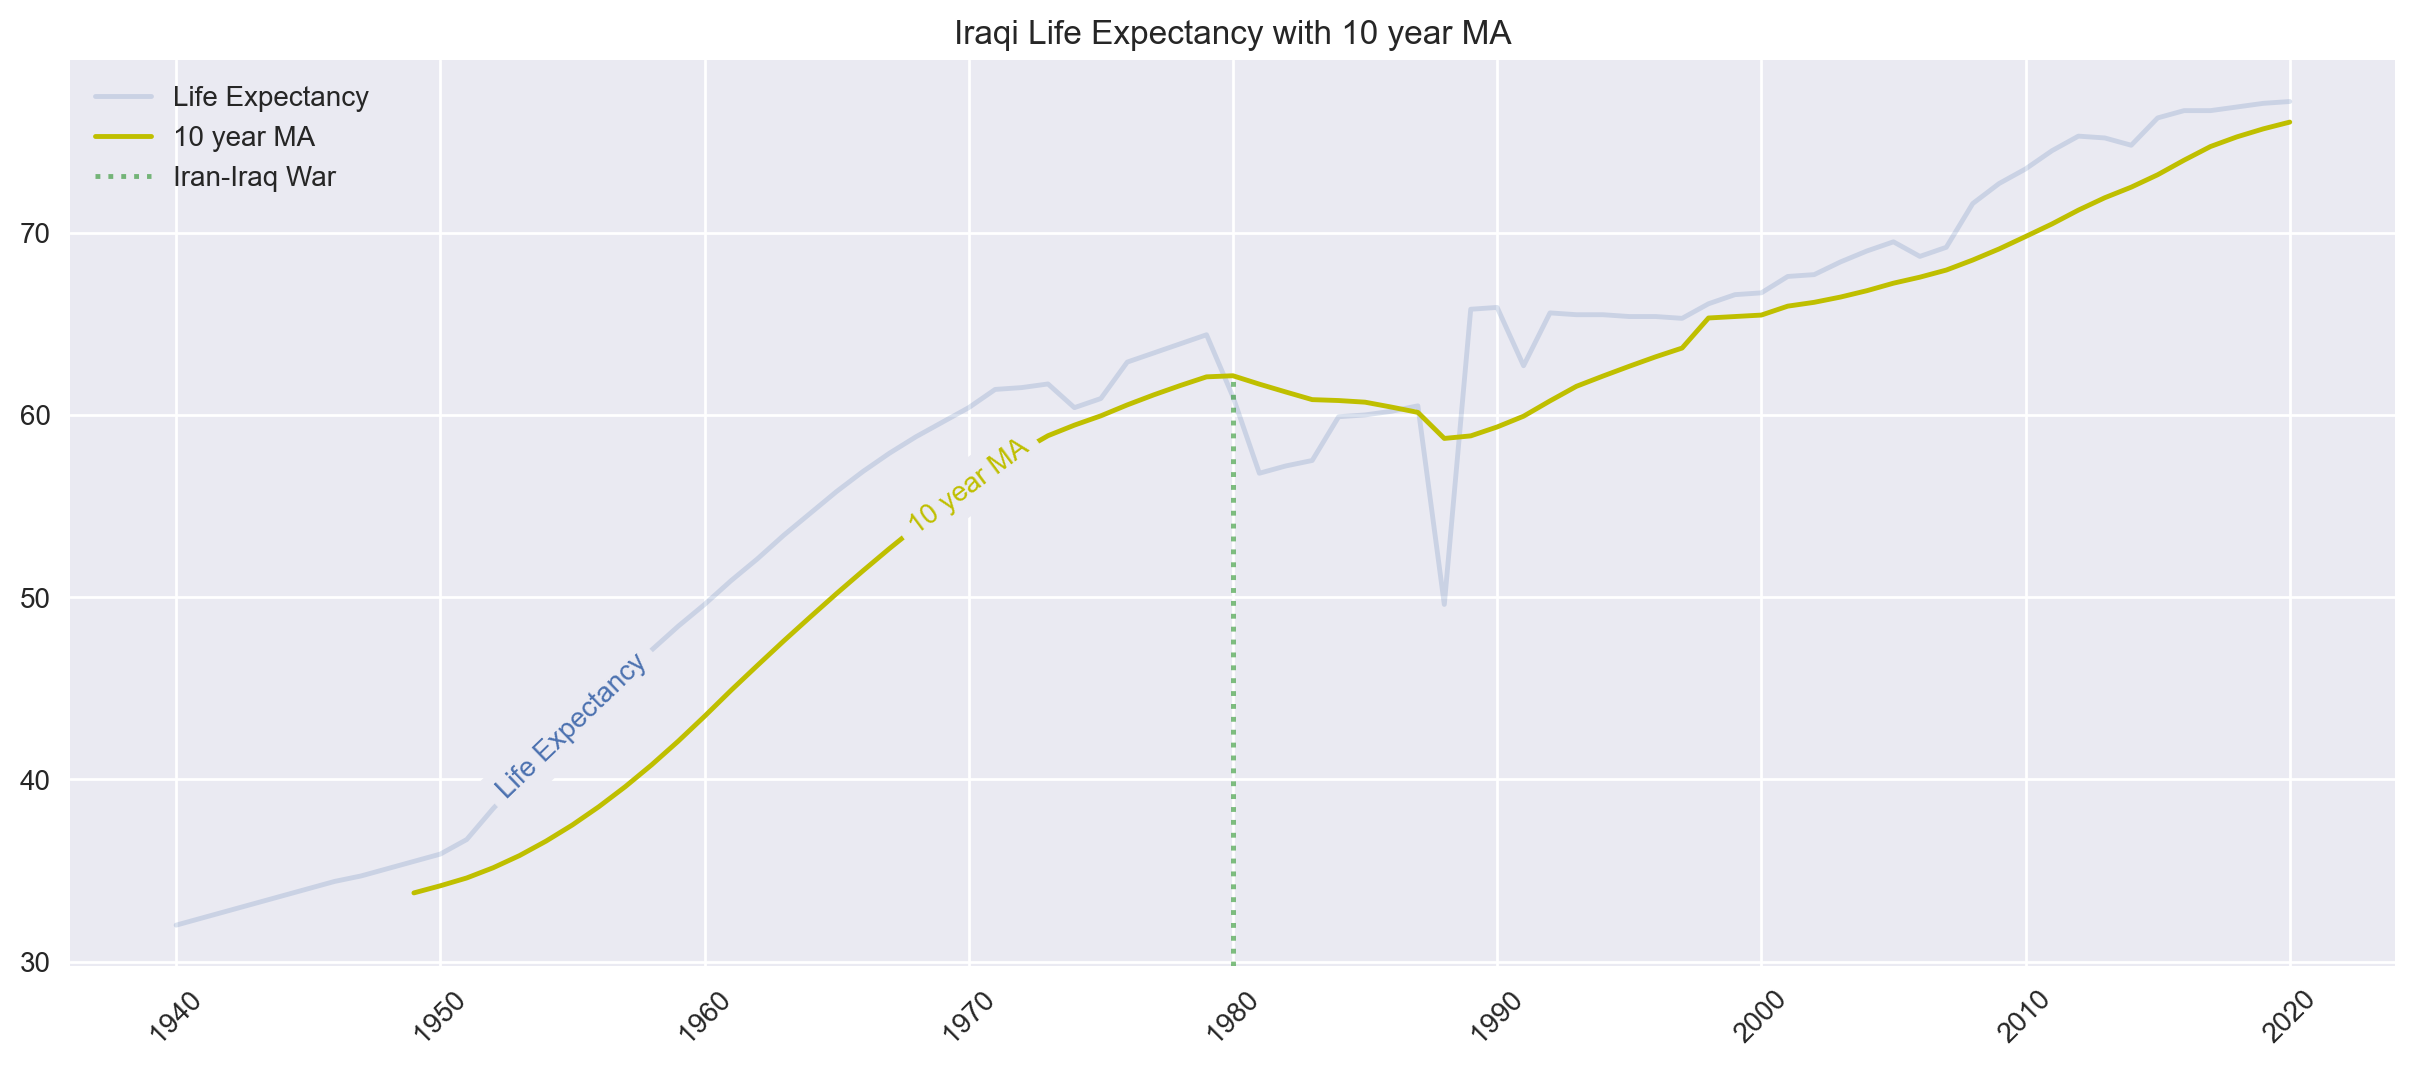

In [160]:
#plot MA overlayed with original data
fig, ax = plt.subplots(figsize=(15,6),dpi=200)
ax.plot(df_iraq['year'],df_iraq['life_expectancy_years'],label='Life Expectancy',alpha=0.2)
ax.plot(df_iraq['year'],df_iraq['10yr_ma'], color='y',label='10 year MA')

#plot formatting
plt.xticks(rotation = 45)
plt.title('Iraqi Life Expectancy with 10 year MA')

plt.axvline(x=1980,ymax=.65,linestyle=':',color='g',label='Iran-Iraq War',alpha=0.5)
plt.legend()

#adding labels to the plotlines
xvals = [1955,1970]
labelLines(plt.gca().get_lines(), zorder=2.5,xvals=xvals);

#### Even the 10 year moving average curve 1980+ shows a significant deviation from the growth prior

## Question 5. What are the differences in life expectancy by gender?

In [161]:
# Life expectancy by gender is broken into two datasets - male and female
# importing and combining both datasets

df_female = import_new_data('life_expectancy_female.csv', 'Iraq')
df_male = import_new_data('life_expectancy_male.csv', 'Iraq')

#merging dfs
df_cmb = pd.merge(df_female,df_male, left_on = 'year', right_on = 'year')

#creating an average of the two
df_cmb['life_expectancy_avg'] = (df_cmb.life_expectancy_female + df_cmb.life_expectancy_male) / 2

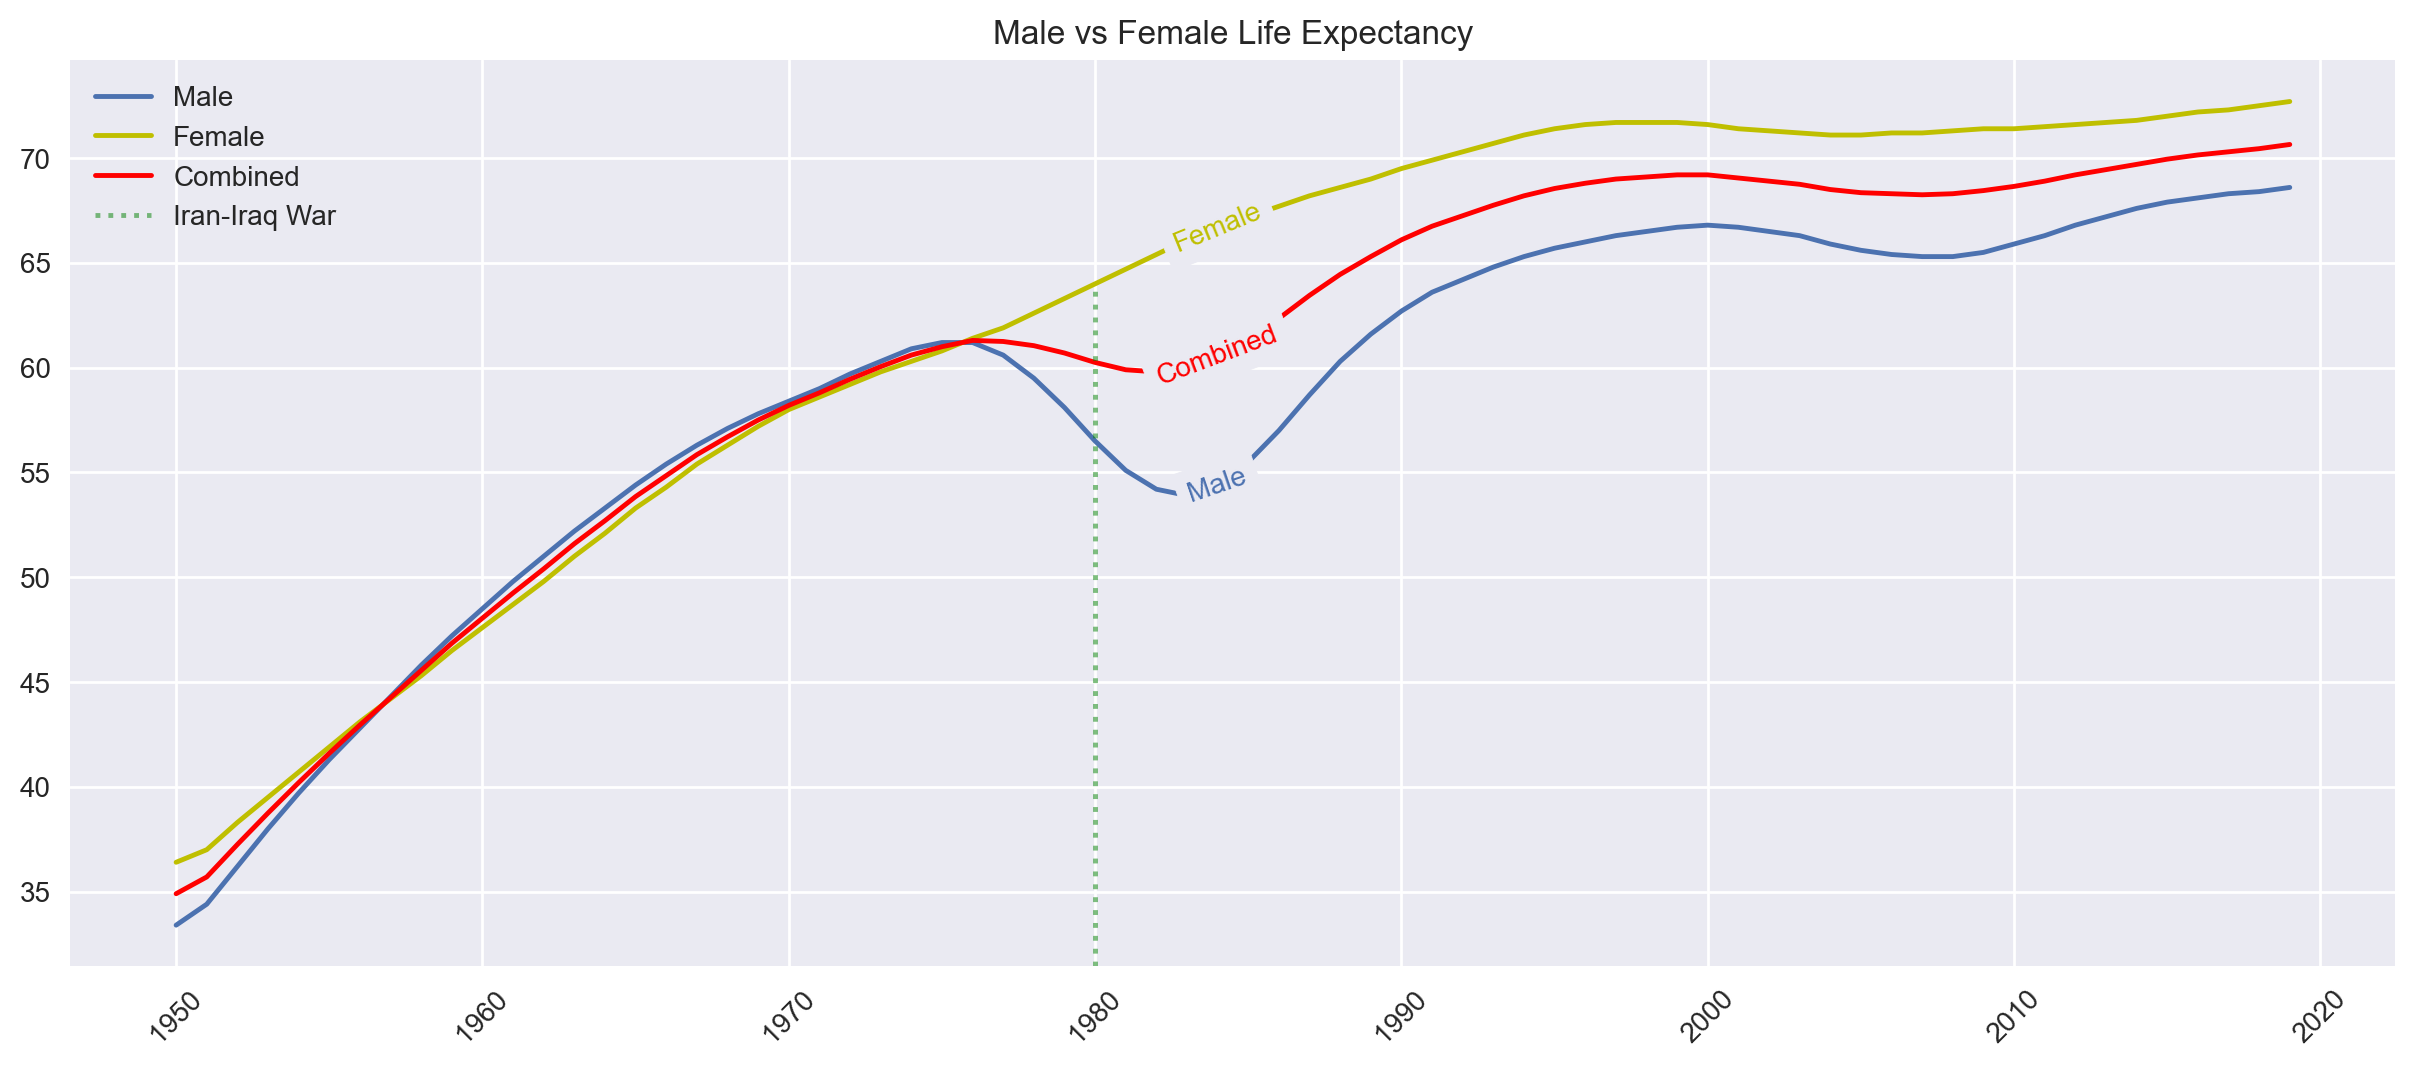

In [162]:
#removing forecast data
df_cmb = df_cmb.query('year < 2020')

#creating plot
fig, ax = plt.subplots(figsize=(15,6),dpi=200)
ax.plot(df_cmb['year'],df_cmb['life_expectancy_male'],label='Male',alpha=1)
ax.plot(df_cmb['year'],df_cmb['life_expectancy_female'], color='y',label='Female')
ax.plot(df_cmb['year'],df_cmb['life_expectancy_avg'], color='r',label='Combined')

plt.xticks(rotation = 45)
plt.title('Male vs Female Life Expectancy')
plt.axvline(x=1980,ymax=.75,linestyle=':',color='g',label='Iran-Iraq War',alpha=0.5)

plt.legend()

#adding labels to the plotlines
xvals = [1984,1984,1984]
labelLines(plt.gca().get_lines(), zorder=2.5,align=True, xvals=xvals);

#### Interesting! While these datasets appear much less granular than the original, this shows that female Iraqi life expectancy remained more or less unchanged on it's growth trajectory, while the overall drop in the 1990's was due exclusively to drops in the male life expectancy data

## Question 6. Are there any good predictive factors for life expectancy available from the Gapminder data?

Possible contributing factors:
- GDP per capita
- GNI per captia
- Education (primary school completion rate)
- Government health expenditure (% of total government expenditure)
- Government military expenditure (% of GDP)
- Armed Forces (% of total labour force)

In [163]:
df_iraq.drop(columns=['10yr_ma'],inplace=True)

In [164]:
#import all new datasets
gdp_df = import_new_data('gdppercapita_ppp.csv','Iraq')
gni_df = import_new_data('gnipercapita_ppp.csv','Iraq')
edu_df = import_new_data('primary_completion_rate_total_percent_of_relevant_age_group.csv','Iraq')
health_df = import_new_data('government_health_spending_of_total_gov_spending_percent.csv','Iraq')
military_exp_df = import_new_data('military_expenditure_percent_of_gdp.csv','Iraq')
army_df = import_new_data('armed_forces_personnel_percent_of_labor_force.csv','Iraq')

In [165]:
df_iraq_new = df_iraq.merge(gdp_df,on='year',how='left').merge(gni_df,on='year',how='left').merge(edu_df,on='year',how='left').merge(health_df,on='year',how='left').merge(military_exp_df,on='year',how='left').merge(army_df,on='year',how='left')

In [166]:
df_iraq_new.rename(columns={'life_expectancy_years':'life_expectancy',
                           'gdppercapita_ppp':'gdp',
                           'gnipercapita_ppp':'gni',
                           'primary_completion_rate_total_percent_of_relevant_age_group':'education',
                           'government_health_spending_of_total_gov_spending_percent':'health_spend',
                           'military_expenditure_percent_of_gdp':'military_spend',
                           'armed_forces_personnel_percent_of_labor_force':'army_size'},inplace=True)

### Using a heatmap of df.corr()

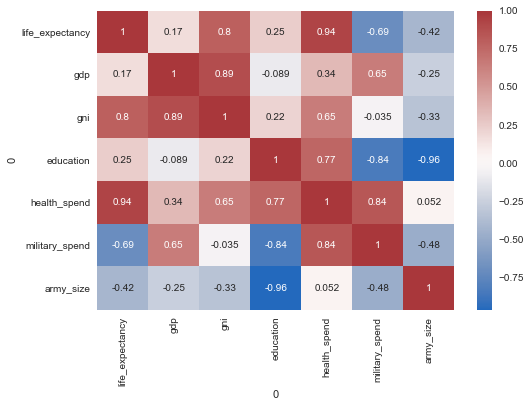

In [167]:
sns.heatmap(df_iraq_new.drop(columns='year').corr(),
            cmap="vlag",
            annot=True);

### Using a heatmap of ppscore (Predictive Power Score)

In [168]:
#removing year from the variables
df_iraq_noyear = df_iraq_new.drop(columns='year')

#creating the ppscore object
pps_df = pps.matrix(df_iraq_noyear)

#pivoting ppscore object into matrix 
pps_matrix = pps_df[['x','y','ppscore']].pivot(columns='x',index='y', values='ppscore')

#reindexing the index and columns to match the corr() matrix for comparison
pps_matrix = pps_matrix.reindex(['life_expectancy','gdp','gni','education','health_spend','military_spend','army_size'])
pps_matrix = pps_matrix.reindex(columns=['life_expectancy','gdp','gni','education','health_spend','military_spend','army_size'])

<AxesSubplot:xlabel='x', ylabel='y'>

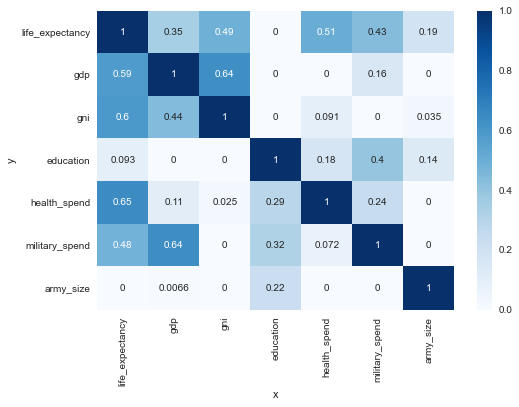

In [169]:
sns.heatmap(pps_matrix,
            vmin=0,
            vmax=1,
            cmap="Blues",
            annot=True)

In [170]:
pps_matrix

x,life_expectancy,gdp,gni,education,health_spend,military_spend,army_size
y,,,,,,,
life_expectancy,1.000000,0.348235,0.490636,0.000000,0.506836,0.433728,0.190333
gdp,0.585205,1.000000,0.635697,0.000000,0.000000,0.156180,0.000000
gni,0.596679,0.443564,1.000000,0.000000,0.091084,0.000000,0.034738
education,0.093268,0.000000,0.000000,1.000000,0.175758,0.396006,0.136364
health_spend,0.645211,0.106881,0.024745,0.286269,1.000000,0.243997,0.000000
military_spend,0.483472,0.636907,0.000000,0.317981,0.072338,1.000000,0.000000
army_size,0.000000,0.006551,0.000000,0.223178,0.000000,0.000000,1.000000


## Question 7. Iraqi GDP vs 10 western nations - 1950 and 2015

In [171]:
gdp_df.head()

,year,gdppercapita_ppp
1,1800,3840.0
2,1801,3840.0
3,1802,3840.0
4,1803,3840.0
5,1804,3840.0


In [172]:
global_gdp = pd.read_csv('gdppercapita_ppp.csv')

iraq_plus_west = ["Iraq","Australia","United Kingdom","United States","Germany","Denmark","Canada","Italy",
                  "Luxembourg","Netherlands","New Zealand"]

ipw_df = global_gdp.query('country == @iraq_plus_west')


In [173]:
ipw_df.head(20)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
8,Australia,817,822,826,831,836,841,845,850,855,...,53000,54000,55100,56200,57400,58600,59700,61000,62200,63500
30,Canada,1310,1320,1330,1340,1350,1360,1360,1370,1380,...,50600,51600,52600,53700,54800,55900,57000,58200,59300,60500
46,Denmark,2010,2020,2020,2020,2030,2030,2030,2040,2040,...,56300,57400,58600,59800,61000,62200,63500,64800,66100,67400
63,Germany,1990,2010,2020,2040,2050,2070,2080,2100,2110,...,55300,56400,57500,58700,59900,61100,62300,63600,64900,66200
78,Iraq,3840,3840,3840,3840,3840,3840,3840,3840,3840,...,16800,17100,17400,17800,18100,18500,18900,19200,19600,20000
81,Italy,2780,2740,2830,2910,3040,2940,3010,3020,3190,...,41300,42100,42900,43800,44700,45600,46500,47500,48400,49400
97,Luxembourg,1450,1450,1450,1450,1450,1450,1450,1450,1450,...,107000,109000,111000,114000,116000,118000,121000,123000,126000,128000
119,Netherlands,3330,3330,3330,3330,3330,3330,3330,3330,2970,...,60100,61300,62500,63800,65100,66400,67800,69100,70500,72000
120,New Zealand,658,658,658,658,659,659,659,659,659,...,41900,42700,43500,44400,45300,46200,47200,48100,49100,50100
183,United Kingdom,3280,3290,3300,3190,3140,3280,3220,3390,3190,...,47200,48100,49100,50100,51100,52200,53200,54300,55400,56500


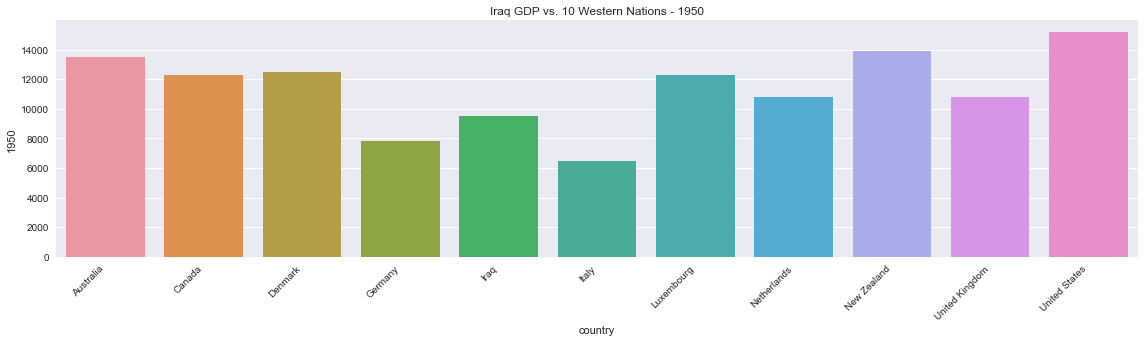

In [174]:
mean_le = sns.catplot(data=ipw_df,x='country',y='1950',kind='bar',height=4,aspect=4,legend=False,orient='v')
plt.title('Iraq GDP vs. 10 Western Nations - 1950')
mean_le.set_xticklabels(rotation=45,horizontalalignment = 'right');

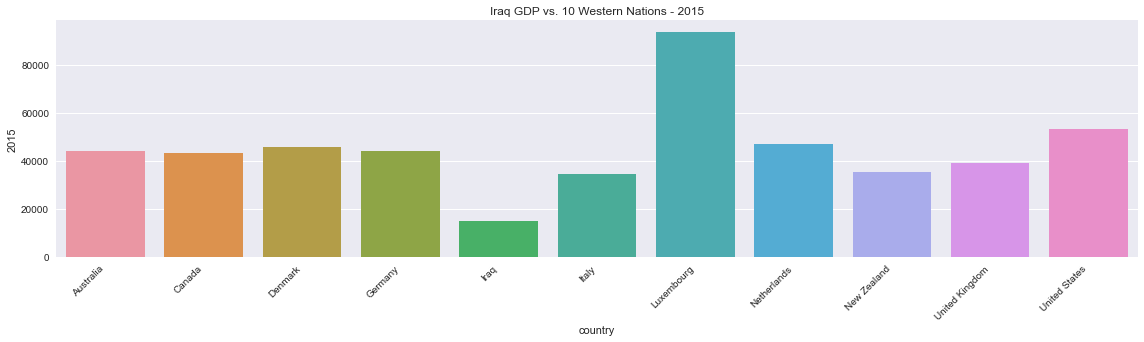

In [175]:
mean_le = sns.catplot(data=ipw_df,x='country',y='2015',kind='bar',height=4,aspect=4,legend=False,orient='v')
plt.title('Iraq GDP vs. 10 Western Nations - 2015')
mean_le.set_xticklabels(rotation=45,horizontalalignment = 'right');

### Bar Chart Race of GDP Over time
###### Bar chart race code credit - https://www.youtube.com/watch?v=qThD1InmsuI
- Please note- ffmpeg is required - if error, run "conda install -c conda-forge ffmpeg" 
- The build on this can also be minutes long so please be patient, or comment out the next 4 cells

In [176]:
#Bar chart race code credit - https://www.youtube.com/watch?v=qThD1InmsuI
import bar_chart_race as bcr
import ffmpeg
ipw_df_t = ipw_df.set_index('country')
ipw_df_t = ipw_df.transpose()

#ipw_df_t.astype('float')

In [177]:
headers = ipw_df_t.iloc[0] 
ipw_df_t.columns = headers
ipw_df_t = ipw_df_t[1:]

In [178]:
ipw_df_t = ipw_df_t.astype('float')

In [179]:
#bcr.bar_chart_race(df = ipw_df_t,title='GDP Change over time')

## Question 7. Income per person - same 11 countries (Iraq + 10 western nations)

In [185]:
#the import_new_data function won't take a list as inputs so i need to import with read_csv and do a little formatting and filtering
income_pp = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income_pp = income_pp.query('country == {}'.format(iraq_plus_west))
income_pp = income_pp.transpose()
income_pp = income_pp.reset_index()
income_pp = income_pp.replace('country','year')

#bring top row up to column headers
headers = income_pp.iloc[0]
income_pp.columns = headers
income_pp = income_pp[1:]

#cast dtypes as ints and filter for year
income_pp = income_pp.astype('int')
income_pp = income_pp.query('year >= 1940 & year <=2020')
income_pp = income_pp.set_index('year')
income_pp.head()

,Australia,Canada,Denmark,Germany,Iraq,Italy,Luxembourg,Netherlands,New Zealand,United Kingdom,United States
year,,,,,,,,,,,
1940,11200,9080,9190,10900,8260,5910,9760,8690,10400,10700,11300
1941,12300,10200,8220,11500,8380,5750,10000,8150,10100,11700,12800
1942,13600,11900,8320,11600,8500,5400,10300,7390,11100,11900,14200
1943,14000,12300,9130,11900,8630,4550,10500,7160,11400,12100,15400
1944,13400,12600,9960,12300,8750,3660,10800,4770,11300,11600,16400


In [186]:
income_pp.tail()

,Australia,Canada,Denmark,Germany,Iraq,Italy,Luxembourg,Netherlands,New Zealand,United Kingdom,United States
year,,,,,,,,,,,
2016,44600,43100,46500,44700,16500,34700,93900,47700,35700,39400,53600
2017,44900,43900,47300,45500,15800,35400,93100,48800,36000,39900,54500
2018,45400,44100,47700,46000,15600,35700,93700,49800,36400,40200,55700
2019,45500,44200,48300,46200,15700,35800,94300,50500,36500,40400,56700
2020,45800,44500,48900,46700,16000,36100,95100,51200,36700,40700,57500


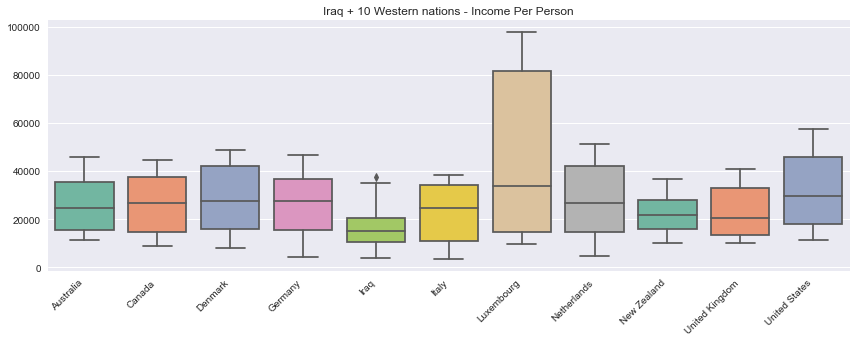

In [187]:
income = sns.catplot(data=income_pp,kind='box', height=4, aspect=3,palette="Set2")
plt.title('Iraq + 10 Western nations - Income Per Person')
income.set_xticklabels(rotation=45,horizontalalignment = 'right');

##### After visually inspecting the Boxplots of Income per person over the period in question, Iraq is clearly far lower overall, however it does appear to have an extremely large 75th percentile as a proportion of the overall distribution vs the other nations. Maybe a violinplot would show this in greater detail

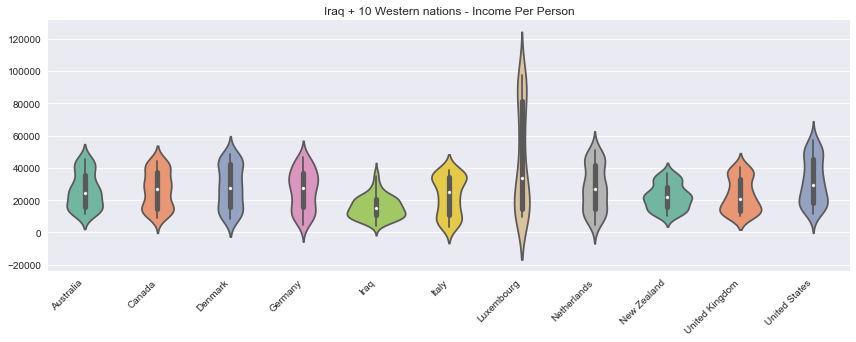

In [188]:
income_violin = sns.catplot(data=income_pp,kind='violin', height=4, aspect=3,palette="Set2")
plt.title('Iraq + 10 Western nations - Income Per Person')
income_violin.set_xticklabels(rotation=45,horizontalalignment = 'right');

##### As expected, the distribution of income per person does look quite different to the others, in that the distribution is skewed more to the lower end. I'll plot the income per person over time against one other nation to see what kinds of differences are visible in the trend

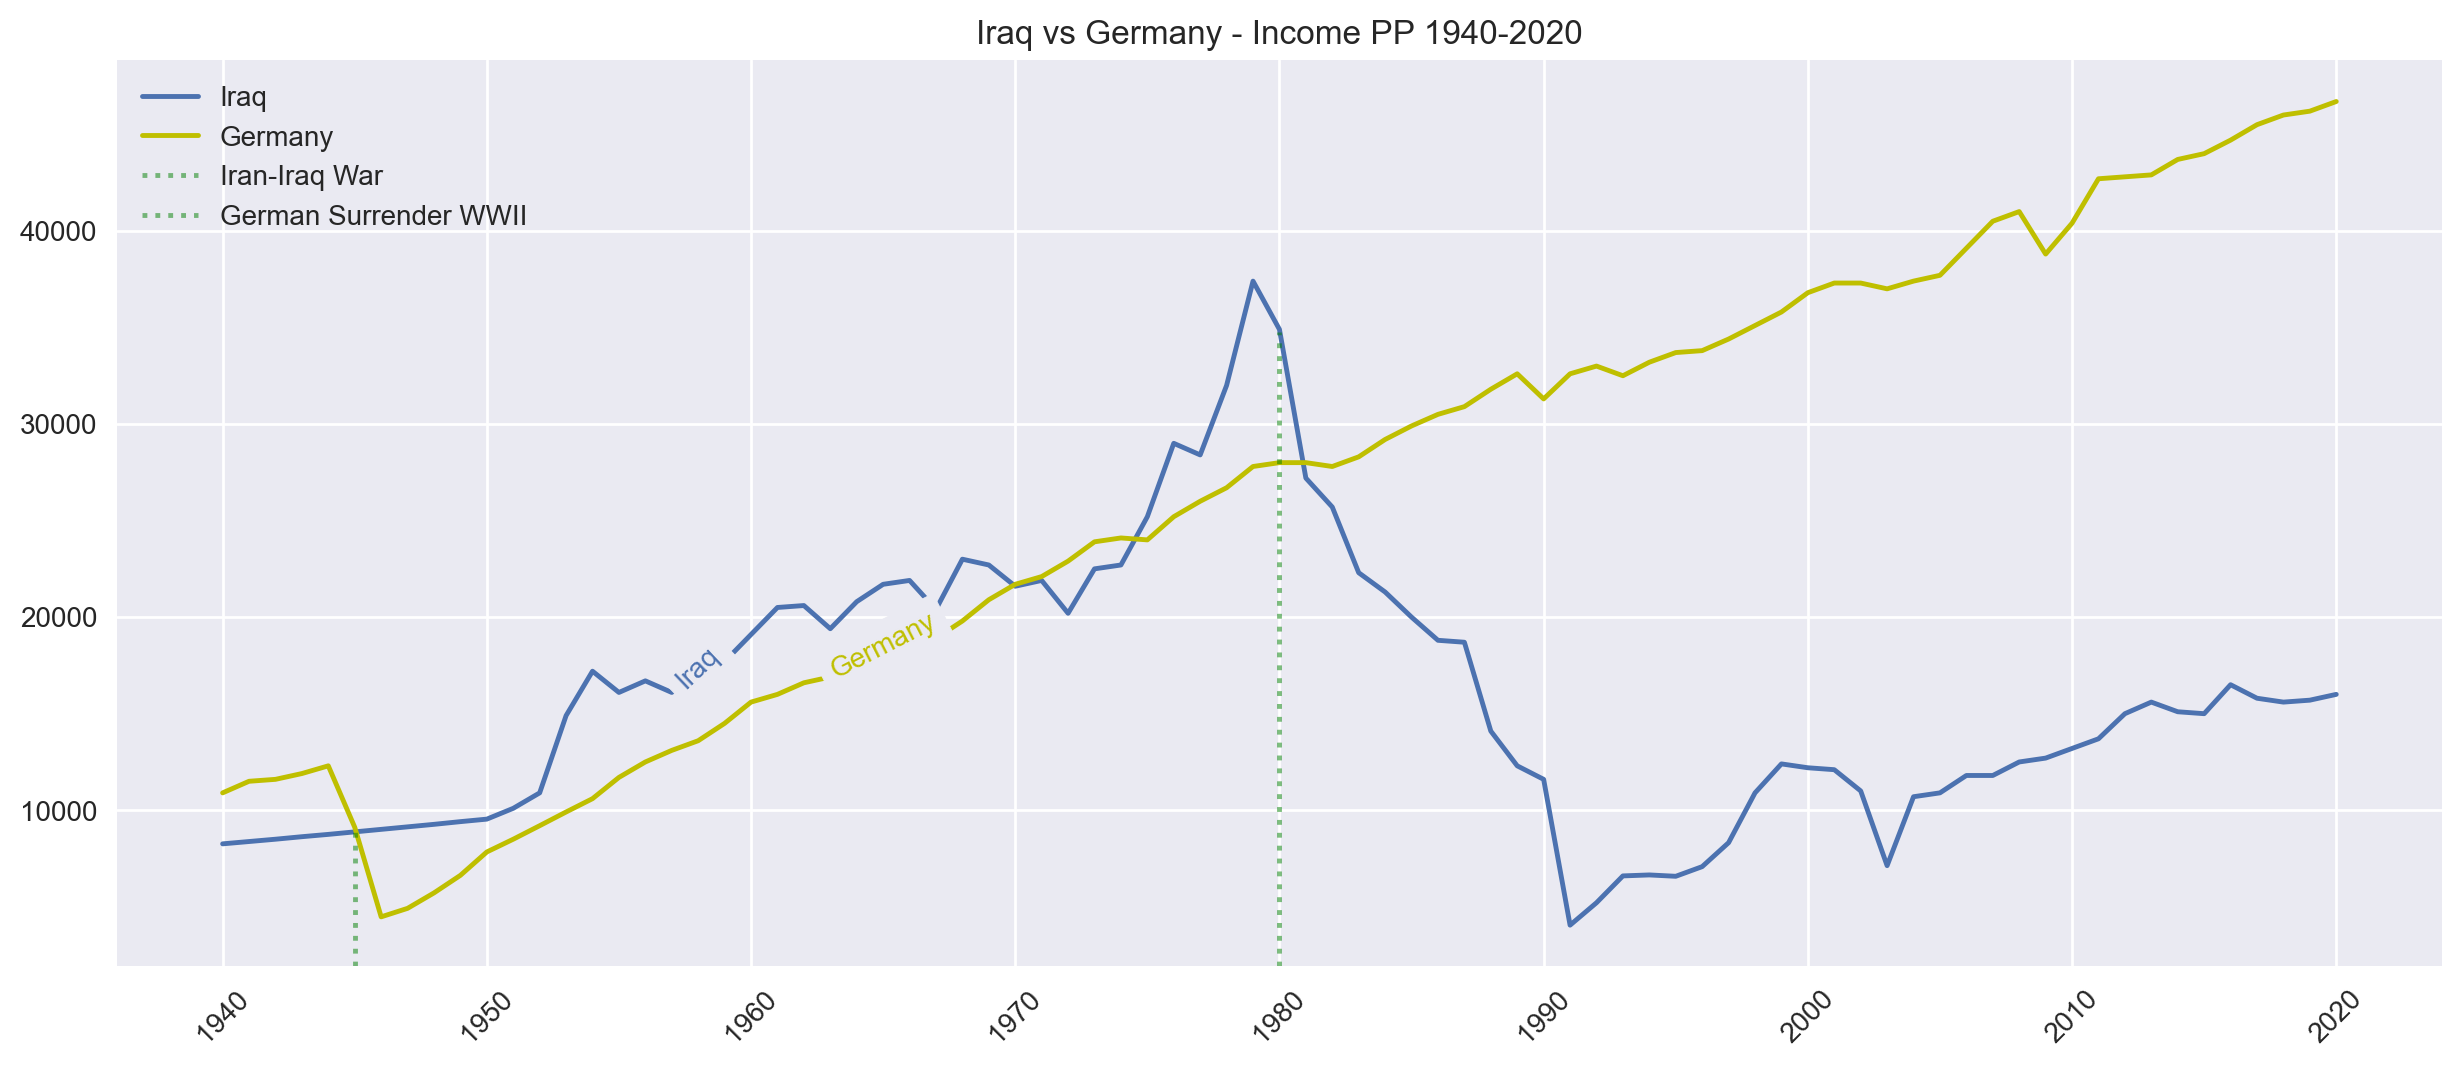

In [194]:
#income_pp.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(15,6),dpi=200)
ax.plot(income_pp['year'],income_pp['Iraq'],label='Iraq')
ax.plot(income_pp['year'],income_pp['Germany'], color='y',label='Germany')

#plot formatting
plt.xticks(rotation = 45)
plt.title('Iraq vs Germany - Income PP 1940-2020')

plt.axvline(x=1980,ymax=.7,linestyle=':',color='g',label='Iran-Iraq War',alpha=0.5)
plt.axvline(x=1945,ymax=.15,linestyle=':',color='g',label='German Surrender WWII',alpha=0.5)

plt.legend()

#adding labels to the plotlines
xvals = [1958,1965]
labelLines(plt.gca().get_lines(), zorder=2.5,xvals=xvals);

##### The plot above shows that both Germany and Iraq suffered major hits to Income per person. Germany's dropped severely around the time of their surrender in World War II, while Iraq's dropped catastrophically over the course of the Iran-Iraq war and has only recovered slightly since. 

##### Regardless of the events, we can see that Iraq's timeline looks dramatically different to Germany's as was alluded to in the box and violin plots above